In [1]:
import sys 
sys.path.append('../')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2
from relation import Distribution

In [6]:
dis = Distribution('x',105,'140','')

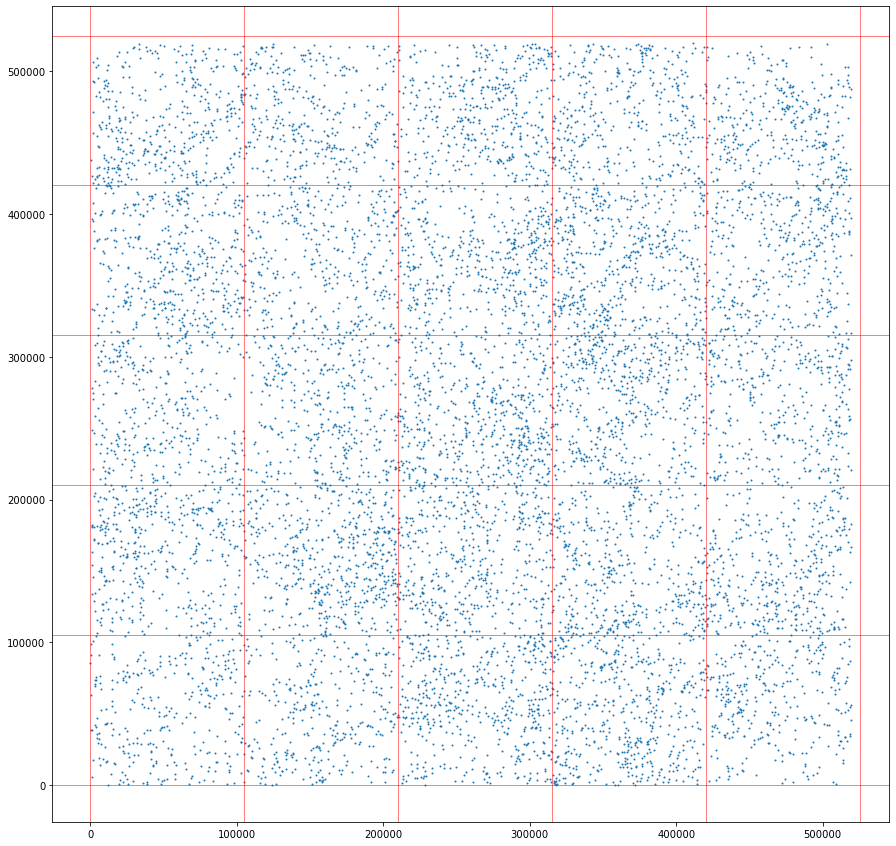

In [7]:
dis.plot()

In [8]:
dis.dataframe

,UID,x[kpc/h],y[kpc/h],z[kpc/h],x_pix,y_pix,i_sector,m500c[Msol/h],r500c[kpc/h],gas_frac,star_frac,T[kev],Lx[1e44erg/s],Y500c,M_sat/M_cD,cshift[kpc],vx[km/s],vy[km/s],vz[km/s]
0,0,208707.3800,203892.310,349705.0300,9714,6893,6,1.032820e+15,1239.470,0.122792,0.028623,9.044580,23.543500,97.814776,0.025279,0.0,-191.69500,-64.8527,-197.449
1,1,314110.3100,24347.102,278058.4400,14620,15250,15,6.263050e+14,1049.090,0.116260,0.029199,6.373800,10.728500,55.243653,0.092982,0.0,-329.93000,45.8412,-256.902
2,2,83776.2580,206510.050,144915.3100,3899,6771,4,7.927850e+14,1134.840,0.121408,0.022461,8.076030,20.825900,79.072321,0.121626,0.0,5.47274,-169.6530,-124.361
3,3,183729.8300,193320.660,332756.0000,8551,7385,6,1.800290e+14,692.373,0.112743,0.026307,3.430610,1.339410,19.028983,0.706301,0.0,852.81600,639.8620,-434.947
4,4,327315.4100,233257.000,209403.9500,15235,5526,7,6.558460e+14,1065.330,0.114432,0.027987,6.241970,9.534250,54.074508,0.060787,0.0,17.03470,259.9550,-111.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10488,15109,245532.7300,47902.445,327681.7500,11428,14154,14,7.078800e+12,235.432,0.071753,0.027462,0.279663,0.011799,0.335735,0.557929,0.0,11.14620,-415.8640,-76.752
10489,15124,93769.9140,81091.062,252886.4400,4364,12609,13,7.258270e+12,237.408,0.064047,0.031599,0.330750,0.010331,0.357384,0.236394,0.0,35.06560,223.1580,-216.831
10490,15297,165208.6700,66284.719,57955.0550,7689,13298,13,7.186580e+12,236.624,0.051829,0.034700,0.393374,0.006633,0.342830,0.589790,0.0,-96.62210,111.1270,147.111
10491,15831,65617.1250,153918.000,3217.6663,3054,9219,8,7.527190e+12,240.301,0.078434,0.023595,0.315919,0.013869,0.423153,0.464481,0.0,-212.09800,247.3330,557.996


In [25]:
dis.cube_density()

Calculating density: 100%|██████████| 125/125 [00:00<00:00, 182297.64cube/s]
Calculating density: 283cube [00:00, 6975.96cube/s]

224
403
122
224
432
432
121
032
443
312
413
330
432
131
334
203
332
411
330
133
323
022
434
403
330
000
022
411
421
434
240
222
230
041
243
232
032
021
340
300
011
434
423
033
443
300
003
014
113
431
103
103
122
343
133
423
024
122
330
332
344
044
344
033
224
104
033
023
432
224
421
341
412
342
403
103
344
342
033
421
401
443
401
422
341
021
034
140
341
422
344
232
430
222
011
224
220
300
344
213
344
303
302
003
104
221
314
043
221
030
444
111
211
412
033
104
414
434
230
241
011
342
332
323
321
221
432
343
003
422
032
341
342
224
202
410
220
101
030
141
303
432
403
023
104
422
300
401
034
142
202
000
330
220
123
044
421
041
300
233
332
320
033
300
332
302
104
440
433
421
200
041
302
213
432
242
210
224
222
423
224
420
311
322
143
344
130
211
031
402
011
312
433
042
430
233
411
412
133
442
422
043
324
202
420
430
104
022
432
321
223
421
322
342
332
032
403
444
203
420
044
211
343
034
020
423
041
320
224
400
323
044
323
021
023
131
340
312
433
204
403
020
232
332
341
020
341
222
223
232


KeyError: '0.0'

In [ ]:
dis.dataframe

,UID,x[kpc/h],y[kpc/h],z[kpc/h],x_pix,y_pix,i_sector,m500c[Msol/h],r500c[kpc/h],gas_frac,star_frac,T[kev],Lx[1e44erg/s],Y500c,M_sat/M_cD,cshift[kpc],vx[km/s],vy[km/s],vz[km/s],cube
0,0,208707.3800,203892.310,349705.0300,9714,6893,6,1.032820e+15,1239.470,0.122792,0.028623,9.044580,23.543500,97.814776,0.025279,0.0,-191.69500,-64.8527,-197.449,224
1,1,314110.3100,24347.102,278058.4400,14620,15250,15,6.263050e+14,1049.090,0.116260,0.029199,6.373800,10.728500,55.243653,0.092982,0.0,-329.93000,45.8412,-256.902,403
2,2,83776.2580,206510.050,144915.3100,3899,6771,4,7.927850e+14,1134.840,0.121408,0.022461,8.076030,20.825900,79.072321,0.121626,0.0,5.47274,-169.6530,-124.361,122
3,3,183729.8300,193320.660,332756.0000,8551,7385,6,1.800290e+14,692.373,0.112743,0.026307,3.430610,1.339410,19.028983,0.706301,0.0,852.81600,639.8620,-434.947,224
4,4,327315.4100,233257.000,209403.9500,15235,5526,7,6.558460e+14,1065.330,0.114432,0.027987,6.241970,9.534250,54.074508,0.060787,0.0,17.03470,259.9550,-111.475,432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10488,15109,245532.7300,47902.445,327681.7500,11428,14154,14,7.078800e+12,235.432,0.071753,0.027462,0.279663,0.011799,0.335735,0.557929,0.0,11.14620,-415.8640,-76.752,304
10489,15124,93769.9140,81091.062,252886.4400,4364,12609,13,7.258270e+12,237.408,0.064047,0.031599,0.330750,0.010331,0.357384,0.236394,0.0,35.06560,223.1580,-216.831,113
10490,15297,165208.6700,66284.719,57955.0550,7689,13298,13,7.186580e+12,236.624,0.051829,0.034700,0.393374,0.006633,0.342830,0.589790,0.0,-96.62210,111.1270,147.111,200
10491,15831,65617.1250,153918.000,3217.6663,3054,9219,8,7.527190e+12,240.301,0.078434,0.023595,0.315919,0.013869,0.423153,0.464481,0.0,-212.09800,247.3330,557.996,020


In [29]:
dis.dataframe

,UID,x[kpc/h],y[kpc/h],z[kpc/h],x_pix,y_pix,i_sector,m500c[Msol/h],r500c[kpc/h],gas_frac,star_frac,T[kev],Lx[1e44erg/s],Y500c,M_sat/M_cD,cshift[kpc],vx[km/s],vy[km/s],vz[km/s],cube
0,0,208707.3800,203892.310,349705.0300,9714,6893,6,1.032820e+15,1239.470,0.122792,0.028623,9.044580,23.543500,97.814776,0.025279,0.0,-191.69500,-64.8527,-197.449,224
1,1,314110.3100,24347.102,278058.4400,14620,15250,15,6.263050e+14,1049.090,0.116260,0.029199,6.373800,10.728500,55.243653,0.092982,0.0,-329.93000,45.8412,-256.902,403
2,2,83776.2580,206510.050,144915.3100,3899,6771,4,7.927850e+14,1134.840,0.121408,0.022461,8.076030,20.825900,79.072321,0.121626,0.0,5.47274,-169.6530,-124.361,122
3,3,183729.8300,193320.660,332756.0000,8551,7385,6,1.800290e+14,692.373,0.112743,0.026307,3.430610,1.339410,19.028983,0.706301,0.0,852.81600,639.8620,-434.947,224
4,4,327315.4100,233257.000,209403.9500,15235,5526,7,6.558460e+14,1065.330,0.114432,0.027987,6.241970,9.534250,54.074508,0.060787,0.0,17.03470,259.9550,-111.475,432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10488,15109,245532.7300,47902.445,327681.7500,11428,14154,14,7.078800e+12,235.432,0.071753,0.027462,0.279663,0.011799,0.335735,0.557929,0.0,11.14620,-415.8640,-76.752,304
10489,15124,93769.9140,81091.062,252886.4400,4364,12609,13,7.258270e+12,237.408,0.064047,0.031599,0.330750,0.010331,0.357384,0.236394,0.0,35.06560,223.1580,-216.831,113
10490,15297,165208.6700,66284.719,57955.0550,7689,13298,13,7.186580e+12,236.624,0.051829,0.034700,0.393374,0.006633,0.342830,0.589790,0.0,-96.62210,111.1270,147.111,200
10491,15831,65617.1250,153918.000,3217.6663,3054,9219,8,7.527190e+12,240.301,0.078434,0.023595,0.315919,0.013869,0.423153,0.464481,0.0,-212.09800,247.3330,557.996,020


In [10]:
for i in range(5):
    
    j = len(dis.get_cube_ijk(0,0,i))
    if j > 0:
        print(i,j)


0 52
1 74
2 47
3 94
4 70


In [26]:
dis.get_grid()

[128.09465160909357,
 10128.094651609093,
 20128.09465160909,
 30128.09465160909,
 40128.09465160909,
 50128.09465160909,
 60128.09465160909,
 70128.09465160909,
 80128.09465160909,
 90128.09465160909,
 100128.09465160909,
 110128.09465160909,
 120128.09465160909,
 130128.09465160909,
 140128.09465160908,
 150128.09465160908,
 160128.09465160908,
 170128.09465160908,
 180128.09465160908,
 190128.09465160908,
 200128.09465160908,
 210128.09465160908,
 220128.09465160908,
 230128.09465160908,
 240128.09465160908,
 250128.09465160908,
 260128.09465160908,
 270128.0946516091,
 280128.0946516091,
 290128.0946516091,
 300128.0946516091,
 310128.0946516091,
 320128.0946516091,
 330128.0946516091,
 340128.0946516091,
 350128.0946516091,
 360128.0946516091,
 370128.0946516091,
 380128.0946516091,
 390128.0946516091,
 400128.0946516091,
 410128.0946516091,
 420128.0946516091,
 430128.0946516091,
 440128.0946516091,
 450128.0946516091,
 460128.0946516091,
 470128.0946516091,
 480128.0946516091,
 

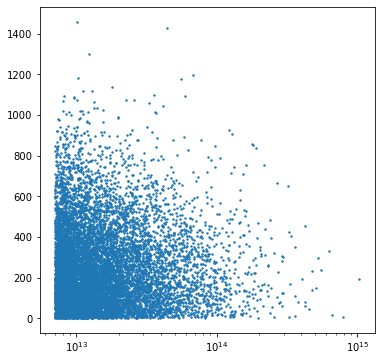

In [21]:
plt.figure(figsize=(6,6))

plt.scatter(dis.dataframe['m500c[Msol/h]'],np.abs(dis.dataframe['vx[km/s]']),s=2)
plt.xscale('log')

In [10]:
import numpy as np

In [11]:
a = np.array([1,2,3,4,0,6,0,6,6,6,0,0])

In [12]:
a

array([1, 2, 3, 4, 0, 6, 0, 6, 6, 6, 0, 0])

In [14]:
mask = a == 0

In [16]:
mask_a = np.ma.MaskedArray(a,mask)

In [18]:
mask_a.mean()

4.25

In [19]:
a.mean()

2.8333333333333335